<a href="https://colab.research.google.com/github/EDANHS/ADA-informes/blob/main/Informe8-OptimalBTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Árbol binario de búsqueda óptimo

---

Cuando queremos guardar datos y encontrarlos en un tiempo constante usamos la estructura tabla Hash, sabiendo cómo funciona, tenemos que ocupar mucha memoria consecutiva para almacenar $n$ datos, estos pueden a llegar a muchos, lo cual, en ocasiones no puede ser lo más optimo. Para realizar búsquedas relativamente rápidas y tener un manejo de la memoria más estable usamos los árboles binarios de búsqueda, dichos árboles permiten encontrar datos en un tiempo $O(log n)$. Teniendo en cuenta lo anterior, ¿es posible mejorar los tiempos de búsqueda en un árbol binario?

---

##1. Descripción del problema
---

El Optimal BTS es un árbol binario de búsqueda, el cual da tiempos menores a un árbol binario de busqueda normal para encontrar un dato, dando un tiempo esperado según una entrada determinada.

$Entrada:$ Secuencia ordenada de $n$ claves (keys): $K:<K_1,K_2,...,K_n>$. Cada clave $K_i$ tiene una probabilidad $p_i$ de ser buscada. Existen claves ficticias $d_i$ que representan búsquedas fallidas con $K$<sub>$i-1$</sub>$\leq$$d_i$$\leq$$K_i$. Cada clave $d_i$ tiene una probabilidad $q_i$ de ser buscada. La suma de probabilidades debe ser uno.

* $\displaystyle\sum_{i=1}^{n}p_i+\displaystyle\sum_{j=0}^{n}q_j=1$

$Salida:$ Un árbol de búsqueda óptimo, es decir, un árbol que minimice la cantidad esperada de nodos visitados y su costo esperado a la hora de realizar búsquedas.

---

##2. Descripción del algoritmo

Antes de describir cada algoritmo, debemos saber que cada árbol binario de búsqueda óptimo se compone de los siguientes elementos:

* Un arreglo de elementos $K:<K_1,K_2,...,K_n>$, donde cada elemento $K_i$ corresponde a un nodo padre que esta entre $1 \leq i \leq n$

* Un arreglo de elementos $p:<p_1,p_2,...,p_n>$. Cada elemento $p_i$ es la probabilidad asociada a $K_i$ de ser buscada.

* Un arreglo de elementos $d:<d_1,d_2,...,d$<sub>n+1</sub>>, sus elementos corresponden a las claves ficticias o mejor dicho los nodos hojas del árbol y representan las búsquedas fallidas, estas se mueven en $K$<sub>$i-1$</sub>$\leq$$d_i$$\leq$$K_i$

También debemos considerar como se construye los árboles binarios a partir de un arreglo:

* Sea un arreglo $A=[x_1,x_2,...,x_n]$, se puede construir un árbol escogiendo un nodo $x_i$ que será la raiz y separando el arreglo $A$ en: $A_1=[x_1,...,$x<sub>i-1</sub>] $;$ $A_2=[$x<sub>i+1</sub>$,...,x_n]$. Siguiendo estos mismos pasos con los sub-arreglos se puede construir un árbol hasta que sea un único elemento del arreglo.

El algoritmo recursivo posee una subestructura óptima, la cual dice que si podemos construir un árbol binario de búsqueda óptimo $T$, significa que un sub-árbol $T'$ con claves $K = [ki ....kj]$ debe ser óptimo (minimice los costos de recorrer el árbol). Si no fuera así y hubiera otro sub-árbol $T''$ que minimice los costos mejor que $T'$ se contradice la optimización de este sub-árbol, en ese caso, solo se debe remplazar el sub-árbol, por lo cual, ahora si el árbol $T$ pasara a ser óptimo.

Al saber lo anterior, podemos decir que se puede construir una solución óptima a partir de soluciones óptimas, para la clave $k_r$ donde $i \leq r \leq j$, se puede escoger un $k_r$ que será la raiz de un sub-árbol óptimo, en esta separación, podemos contruir otros sub-árboles desde $[k_i...$k<sub>r-1</sub>$]$ y $[$k<sub>r-1</sub>$,...k_j]$. Al momento de analizar los posibles candidatos $k_r$ se iran verificando y construyendo todos los sub-árboles óptimos izquierdo y derechos al nodo $k_r$, como esto verifica cada combinación posible, se puede garantizar la construcción de un árbol binario de búsqueda óptimo. Además debemos considerar si en algún momento nos da alguna combinación $k_x$ que pertenezca $k_x,...,$k<sub>x-1</sub> significa que no hay solución que se encuentre en el arreglo $K$ y por tanto es una solución ficticia perteneciente a $d$.


###2.1 Algoritmo recursivo

Pasos a seguir:

* Al escoger un valor $k_r$ perteneciente a $i \leq r \leq j$ se llama a la función de forma recursiva y se les da los sub-arreglos generados por la partición en $k_r$

* Se calcula el costo esperado entre i y j.

* Si j es igual a i, no existen claves reales, por lo que, se retorna la clave ficticia $d$<sub>i-1</sub>.


Para calcular el costo esperado se define como:

* Costo_esperado[i,j] = min(Costo_esperado[i,r-1] + Costo_esperado[r+1,j] + Sumatoria_de_probabilidad(i,j))

* Sumatoria_de_probabilidad =  $\displaystyle\sum_{l=i}^{j}p_l + \displaystyle\sum_{l=i-1}^{j}q_l $

* Si hay una clave ficticia el coste esperado es la probabilidad de la clave ficticia.



###2.2 Algoritmo con solución Bottom-Up

Teniendo en cuenta que aplicar un algoritmo recursivo puede tener costes muy altos, se puede proponer una solución más eficiente ocupando matrices. Esta realiza los siguientes pasos:

* Se debe almacenar los valores para calcular el costo esperado en una matriz de $n+1$ filas y $n$ columnas. Por tanto, se crea dicha matriz $e$. La razón del valor $n+1$ consiste en que debemos almacenar las claves ficticias $d_n$.

* Se debe crear otra matriz $root$ para almacenar los valores de las claves $k_i$ que van de $[0...n]$

* Por último, para almacenar los valores de w(i,j) y no tener que calcularlos de nuevo, se crea una matriz $w$ para guardar los valores del costo esperado.



#3. Código

In [208]:
import random
import numpy as np
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout
from termcolor import colored

In [209]:
def optimal_bst_instance_generator(n):
    keys = sorted(random.sample(range(1, 100), n))
    arr = np.random.random(n*2+1)
    arr /= arr.sum()
    
    p = list(arr[:n]) # Probabilidad de las claves
    q = arr[n:] # Probabilidad de las claves ficticias
    return keys, p, q
    
keys, p, q = optimal_bst_instance_generator(5)
print(keys)
print(p)
print(q)

[11, 19, 41, 42, 96]
[0.09820685357254944, 0.01903740881321035, 0.15780922428951988, 0.0033881984134289636, 0.1462251506193233]
[0.04107957 0.16508502 0.0474213  0.1016993  0.09889552 0.12115246]


In [210]:
def optimalSearchTree(keys, freq, n,Verbose = False,Visualize = False):
    G = nx.DiGraph()
    G,cost = optCost(freq, 0, n - 1)
    if Visualize == True:
      pos = graphviz_layout(G, prog="dot")
      nx.draw(G,pos, with_labels=True, node_size=500, font_color="white", font_size=10, font_weight="black", width  =1.0, edge_color ="green")
    

In [211]:
def optCost(p,q, i, j):
     
    
    if j == i-1:     # un elemento
        return q[i-1]
     
    w = Prob(p,q, i, j)
     
    Min = 9999999999

    for r in range(i, j + 1):
        cost = w + (optCost(p,q, i, r - 1) + optCost(p,q, r + 1, j))
        if cost < Min:
            Min = cost
            aux = r
    return Min

def Prob(p, q, i, j): ##Obtener la suma que hay en el arreglo entre un intervalo
    s = 0
    for k in range(i, j + 1): #[x,x,x,i,...,j,x,x,x] 
        s += p[k]

    for k in range(i-1, j + 1): 
        s += q[k]
    return s

In [212]:
def Optimal_BTS(keys,p,q,n,Verbose = False,Visualize = False):
  cost, root = OptBTS(p,q,n,Verbose)
  if Verbose == True:
    print("Costo:",cost)
    print("Raiz:",root)
  return cost
def OptBTS(p,q,n,Verbose = False):
  cost = np.zeros((n+1,n))
  w = np.zeros((n+1,n))
  root = np.zeros((n,n))

  for i in range(1,n+1):
    cost[i][i-1] = q[i-1]
    w[i][i-1] = q[i-1]
   
  for k in range(1,n+1):
    for i in range(1,n-k+2):
      j = i + k - 1

      if i >= n or j >= n: break
      cost[i][j] = float('inf')
      w[i][j] = w[i][j-1] + p[j] + q[j]
      if Verbose == True:
         print("\n------Calculo de costo--------")
      for r in range(i,j+1):
        
        t = cost[i][r-1] + cost[r+1][j] + w[i][j]
        if Verbose == True:print(colored("costo óptimo minimo:","blue"),t)
        if t < cost[i][j]:
          cost[i][j] = t
          root[i][j] = r

          if Verbose == True:print(colored("costo óptimo minimo:","cyan"),cost[i][j])
  if Verbose == True:
    print("=====Matriz de costo optimo=====")
    print(colored(cost,"green"))
    print("================================")
    print("=====Matriz de probabilidades======")
    print(colored(w,"cyan"))
    print("===================================")
    print("====Matriz de raices====")
    print(colored(root,"red"))
    print("========================")    
  return cost[1][n-1],root[1][n-1]

In [213]:
claves = [0,1,2,3,4,5]
probP = [0, 0.15, 0.10, 0.05, 0.10, 0.20]
probQ = [0.05, 0.10, 0.05, 0.05, 0.05, 0.10]

print("Costo recursivo:",optCost(probP,probQ,1,len(probP)-1))
print("Costo dinamico:",Optimal_BTS(claves,probP,probQ,len(claves),False,False))


Costo recursivo: 2.75
Costo dinamico: 2.75


#Ejemplo Verbose == True dinamico

In [214]:
Optimal_BTS(claves,probP,probQ,len(claves),True,False)


------Calculo de costo--------
costo óptimo minimo: 0.45000000000000007
costo óptimo minimo: 0.45000000000000007

------Calculo de costo--------
costo óptimo minimo: 0.4
costo óptimo minimo: 0.4

------Calculo de costo--------
costo óptimo minimo: 0.25
costo óptimo minimo: 0.25

------Calculo de costo--------
costo óptimo minimo: 0.30000000000000004
costo óptimo minimo: 0.30000000000000004

------Calculo de costo--------
costo óptimo minimo: 0.5
costo óptimo minimo: 0.5

------Calculo de costo--------
costo óptimo minimo: 0.9
costo óptimo minimo: 0.9
costo óptimo minimo: 0.9500000000000002

------Calculo de costo--------
costo óptimo minimo: 0.7
costo óptimo minimo: 0.7
costo óptimo minimo: 0.8

------Calculo de costo--------
costo óptimo minimo: 0.65
costo óptimo minimo: 0.65
costo óptimo minimo: 0.6
costo óptimo minimo: 0.6

------Calculo de costo--------
costo óptimo minimo: 1.05
costo óptimo minimo: 1.05
costo óptimo minimo: 0.9
costo óptimo minimo: 0.9

------Calculo de costo----

2.75

#3. Correctitud Bottom-Up 



---
##3.1 Correctitud para la subestructura óptima

$Teorema:$ *La subestructura óptima permite minimizar los costos que tendrá un árbol a través de subproblemas.*

Sea un costo $C^*$ el costo del árbol con raíces $k_x$ de un arreglo $K$, podemos calcular el costo mínimo considerando el cálculo de sus subproblemas:


* $C^*$<sub>1,n</sub> = $Min(CombinacionesDeUnArreglo([k_1,k_2,...,k_n]))$

$<$$C^*$<sub>1,n</sub>$>$ corresponde al mínimo valor obtenido para una serie de combinaciones donde se considera a cada elemento $k_i$ una raíz de un árbol binario de búsqueda óptimo. Teniendo en cuenta este elemento como raíz de un árbol podemos considerar un arreglo izquierdo y derecho a este, donde podemos calcular los costos para cada uno de ellos aplicando la misma estrategia anterior.


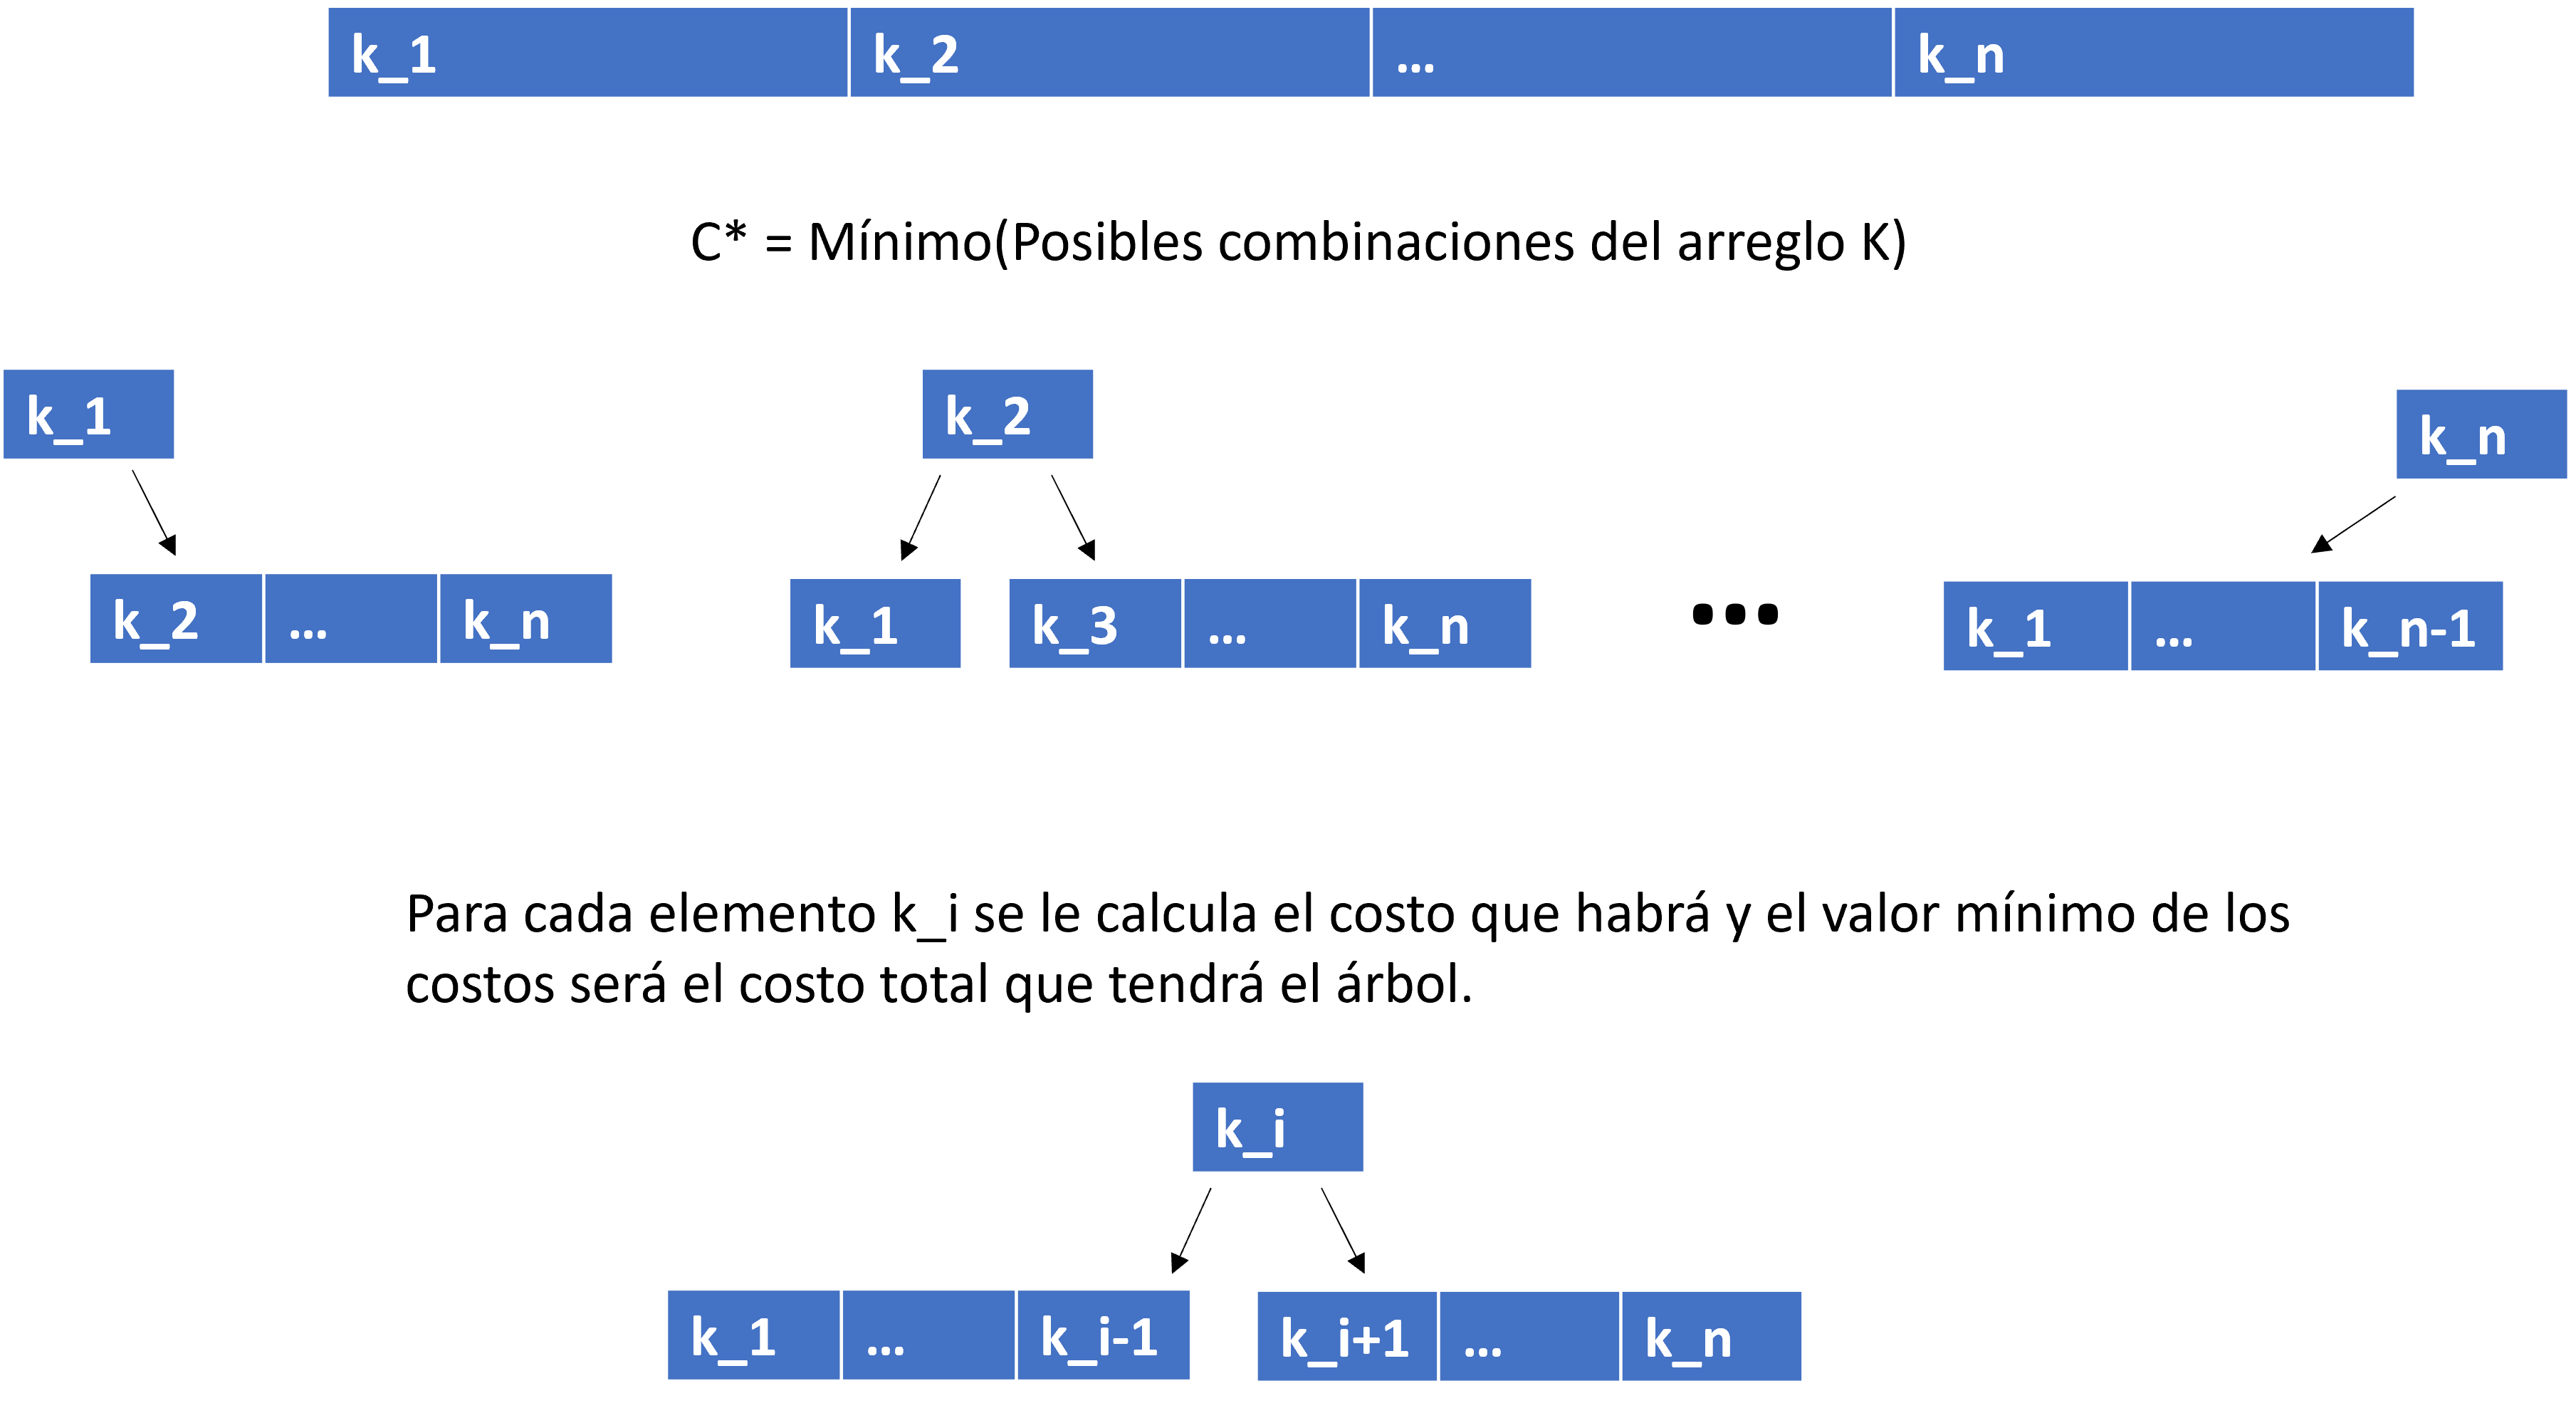

Gracias a esto, podemos calcular el costo dividiendo el problema en subproblemas para cualquier árbol o sub-árbol y cuando se llegue a un caso base de único elemento empezar a calcular el valor mínimo para una combinación posible del árbol principal.

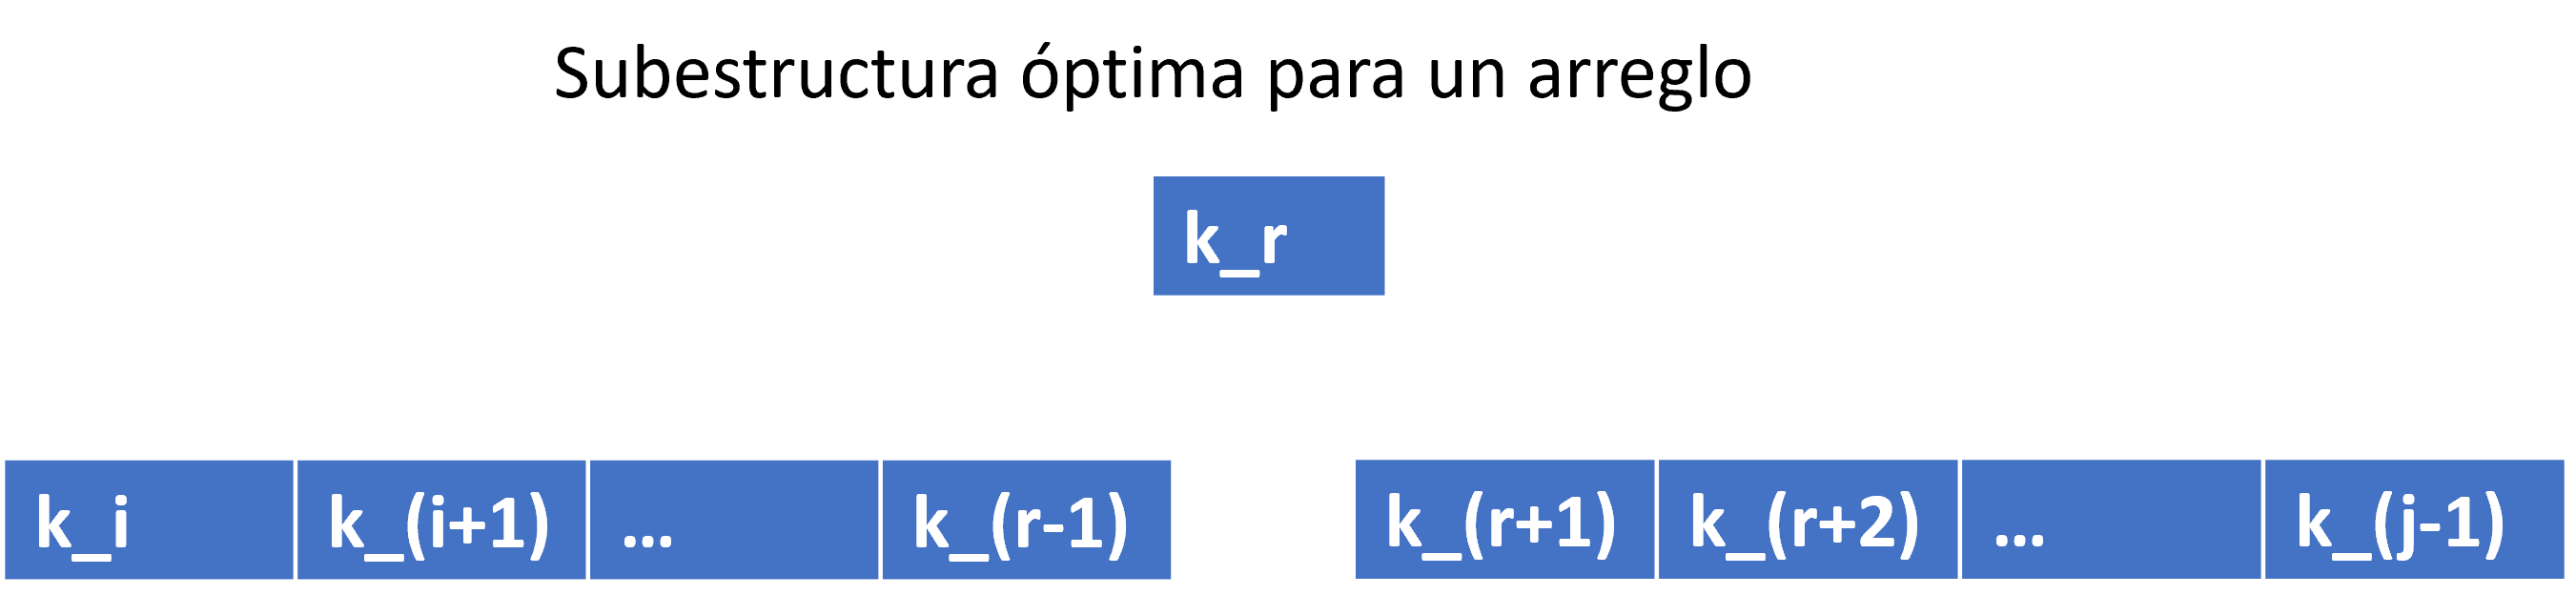

Sabiendo lo anterior, podemos decir que va a llegar un punto que el problema tendrá un caso base, donde es un único elemento del arreglo. Estos corresponden a las probabilidades ficticias que son las hojas de todos los árboles, al volver a armar el árbol iremos calculando los sub-árboles más pequeños y luego los más grandes a partir de los ya resueltos. Según lo anterior, podemos calcular el mínimo de cada árbol formado por una clave $k_i$.

---

---

##3.2 Función de recurrencia del valor óptimo

Dados tres arreglos, uno de claves $(keys)$, probabilidades de keys $(p)$ y probabilidades ficticias $(q)$, podemos definir una función de recurrencia en base al punto anterior (3.1).

Dado una clave $k_r$ perteneciente $[i...j]$ podemos obtener dos estructuras auxiliares:

* Arreglo $A_1$ que va tiene contiene los elementos desde $[i...r-1]$

* Arreglo $A_2$ que va tiene contiene los elementos desde $[r+1...j]$

Dado lo anterior, para cada uno de estos arreglos se puede obtener una un coste mínimo. Este proceso se puede repetir múltiples veces hasta obtener el caso base donde llegamos a las claves ficticias. Por tanto, podemos definir la siguiente función de recurrencia.


* $C$<sub>(i,j)</sub> = $min$<sub>(i $\leq$ k $\leq$ j)</sub> {C<sub>(i,k-1)</sub> + C<sub>(k+1,j)</sub>} $+$ $\displaystyle\sum_{r=i}^{j} p_r$ $+$ $\displaystyle\sum_{r=i-1}^{j} q_r$ $////$ Si y solo si $i < j$


* $C$<sub>(i,j)</sub> = q[i] $////$ Si y solo si $i = j$

Donde C<sub>(i,k-1)</sub> corresponde al costo del arreglo $A_1$ y C<sub>(k+1,j)</sub> corresponde a $A_2$, donde serian el sub-árbol izquierdo y derecho respectivamente.

---


---

##3.3 Correctitud del algoritmo Bottom-Up

$Teorema:$ *El algoritmo resuelto mediante Bottom-up retorna el costo mínimo de un árbol binario de búsqueda óptimo*

Dados tres arreglos, uno de claves $(keys)$ de tamaño $n$, probabilidades de las claves $(p)$ de tamaño $n$ y probabilidades ficticias $(q)$ de tamaño $n+1$, podemos probar por inducción y la lógica que ejerce Bottom-up en este problema, que el algoritmo minimiza el recorrido de un árbol por sus nodos.

Sea $P(1)$ el caso base, correspondiente a un nodo hoja del árbol y esos nodos son las claves ficticias que tienen una probabilidades dadas en el arreglo $q$. Como dichas claves son inexistente, pero se pueden representar por su probabilidad, podemos decir, que dichas probabilidades son equivalentes a los casos bases para empezar a construir el valor óptimo. En consecuencia, a ser valores únicos, también son la subestructura óptima base para obtener el valor óptimo, obteniendo que para dicha subestructura su coste esperado o valor óptimo es correcto.


Sea $P(m)$ con $m < n$ un subproblema o sub-árbol del problema original, podemos decir que estos subproblemas tienen un coste mínimo gracias a la estrategia Bottom-up, debido a que ya teniendo los problemas bases que son las claves ficticias, se pueden ir armando los sub-árboles de abajo hacia arriba y no se necesita descomponer el árbol desde una clave $k_i$ para obtener sus valores base y volver a armar el árbol calculando el coste. Como dichos valores de los subproblemas se van almacenando en estructuras auxiliares, no debemos volver a calcular los valores para valores que ya fueron obtenidos en otras ocasiones como en el caso recursivo. En conclusión, podemos decir que el algoritmo retorna el valor óptimo para un árbol que se puede construir a partir de un arreglo $k$.






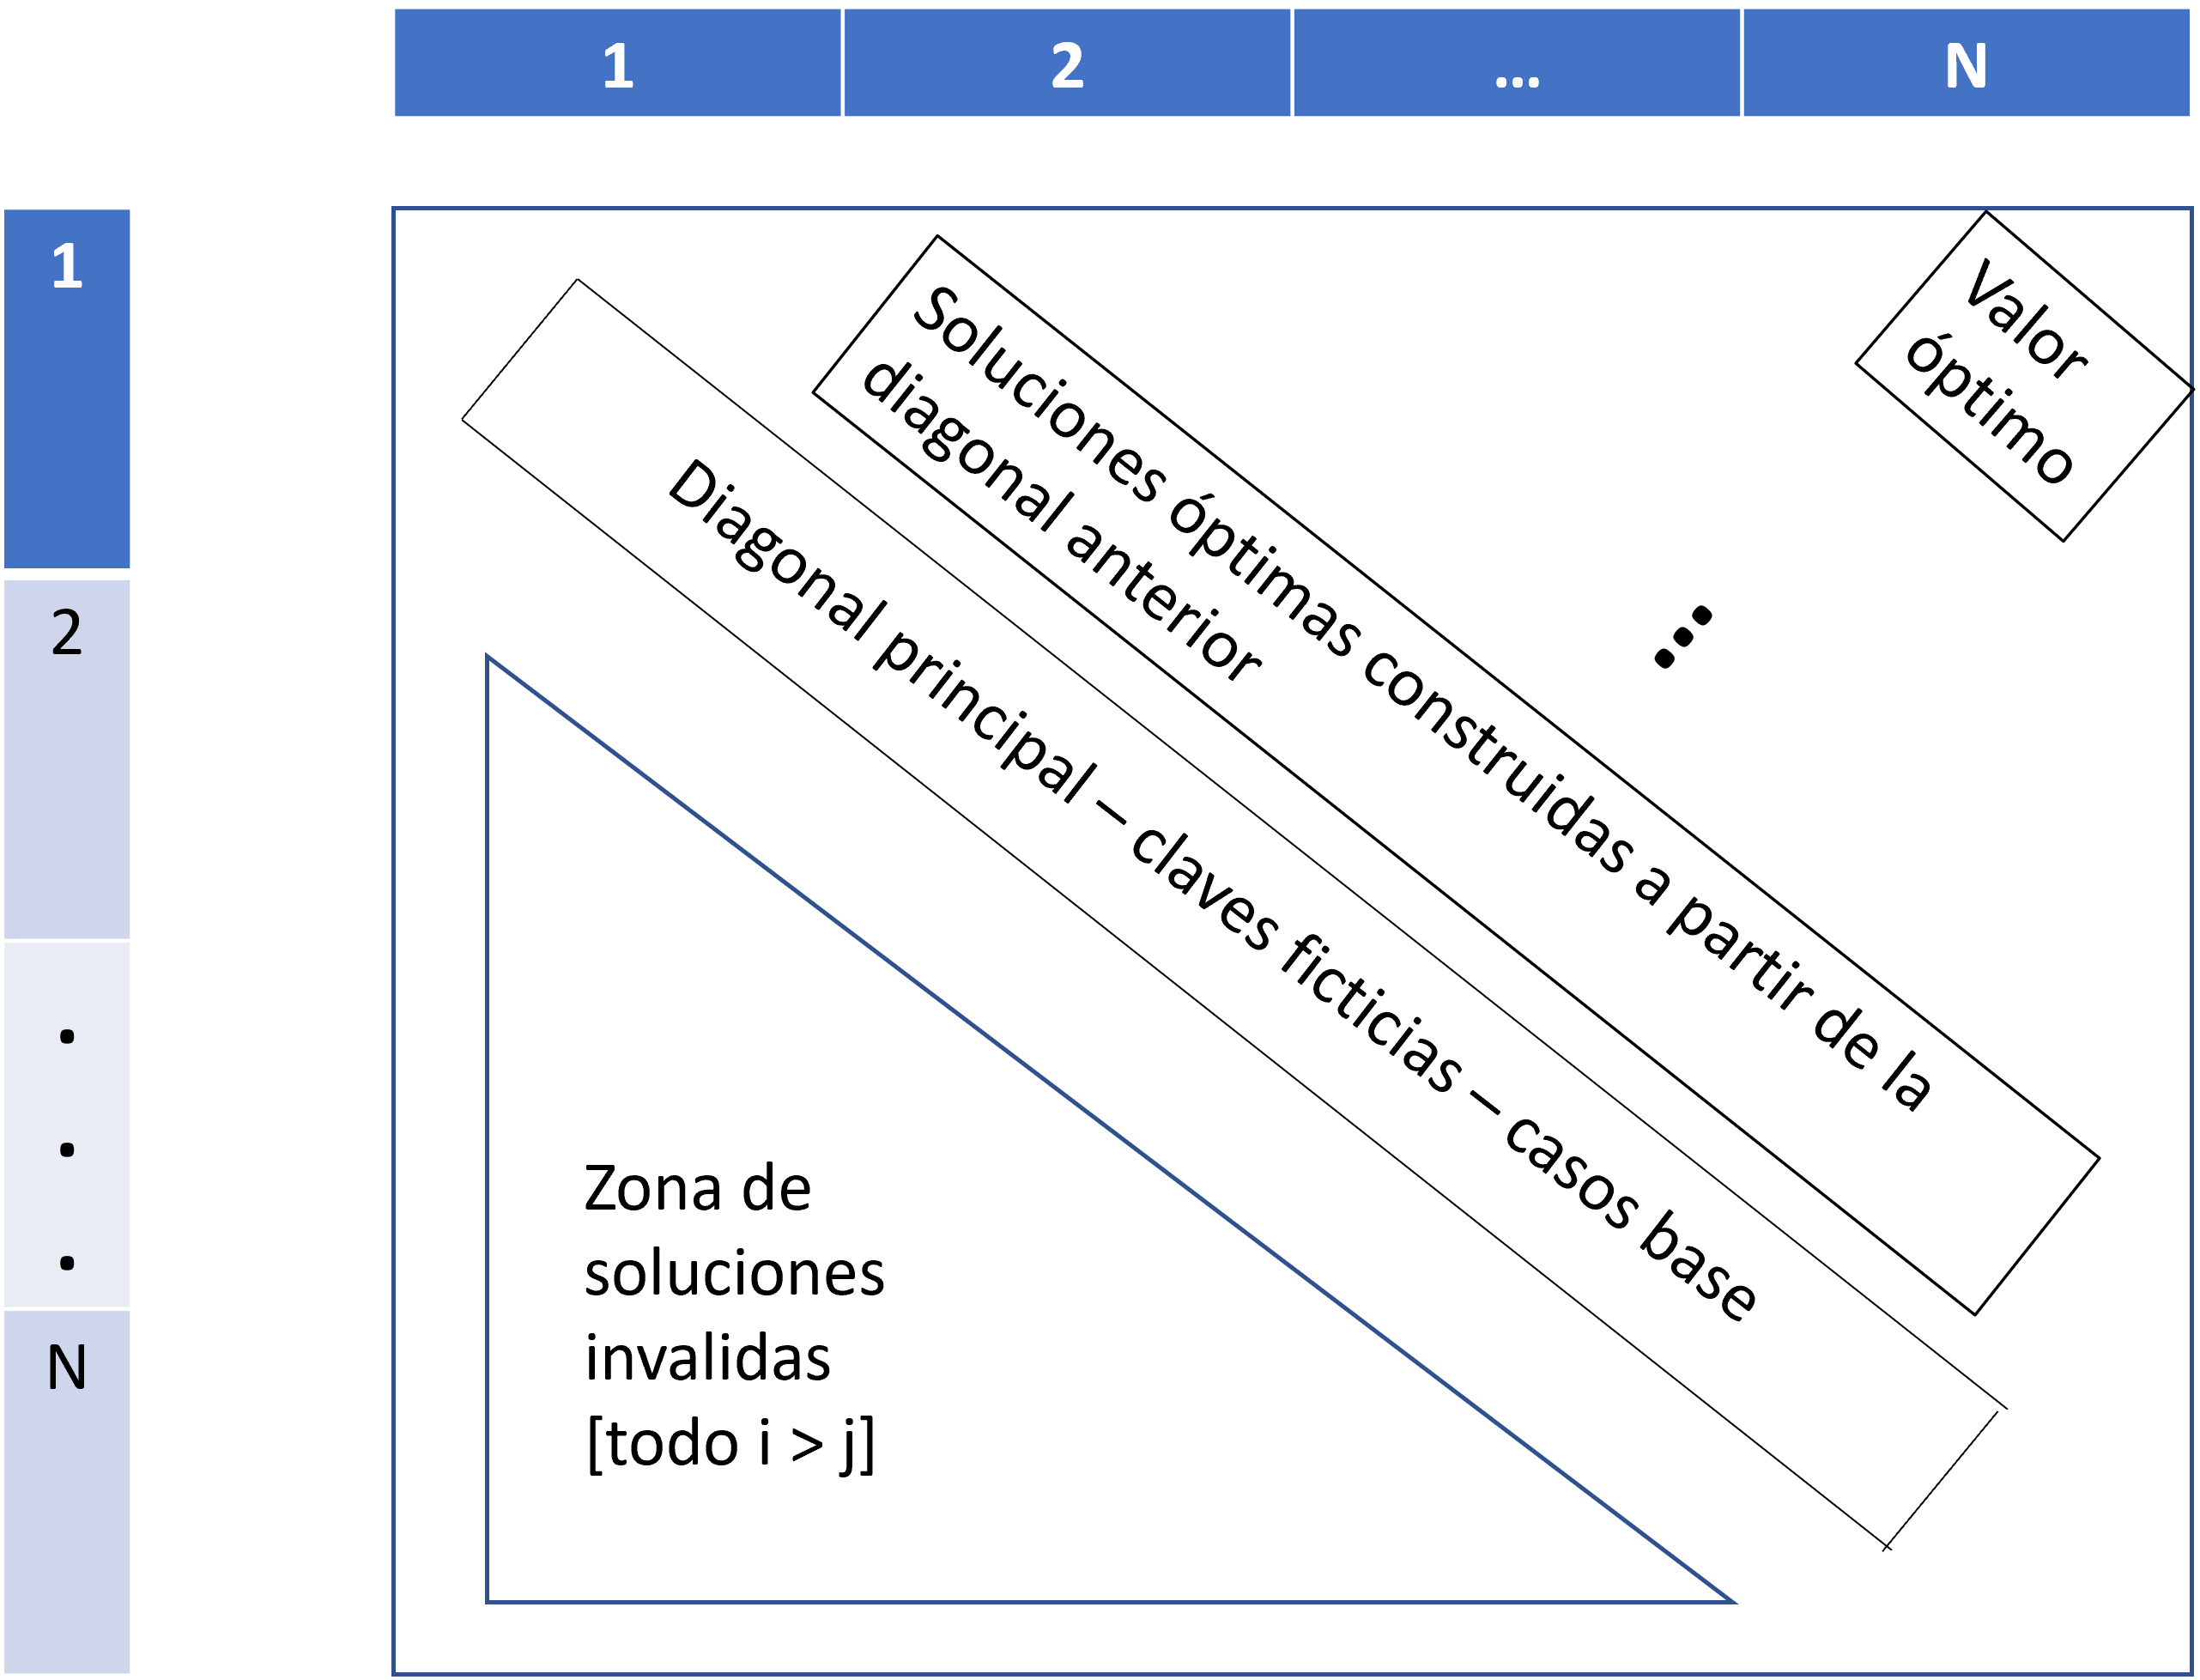

---

---

##3.4 Demostración último paso

---

##4. Tiempo de Ejecución:

Para calcular la complejidad temporal de cada algoritmo se realizará un análisis al manejo de los sub-problemas y la subestructura óptima que realiza cada versión, a fin de demostrar cuantos sub-problemas resuelve el algoritmo, y cuanto tarda en resolver cada uno de aquellos.

---
###**---> Recursivo:**

En el caso del algoritmo recursivo, considera cada recursión como un sub-problema distinto. Esta versión calcula el costo utilizando la subestructura óptima, generando dos recursiones por cálculo, pero al iterar más a fondo, la cantidad de sub-problemas crece según la raíz seleccionada durante el ciclo for inicial.

Se puede observar mejor considerando la representación de la subestructura óptima vista en la correctitud.





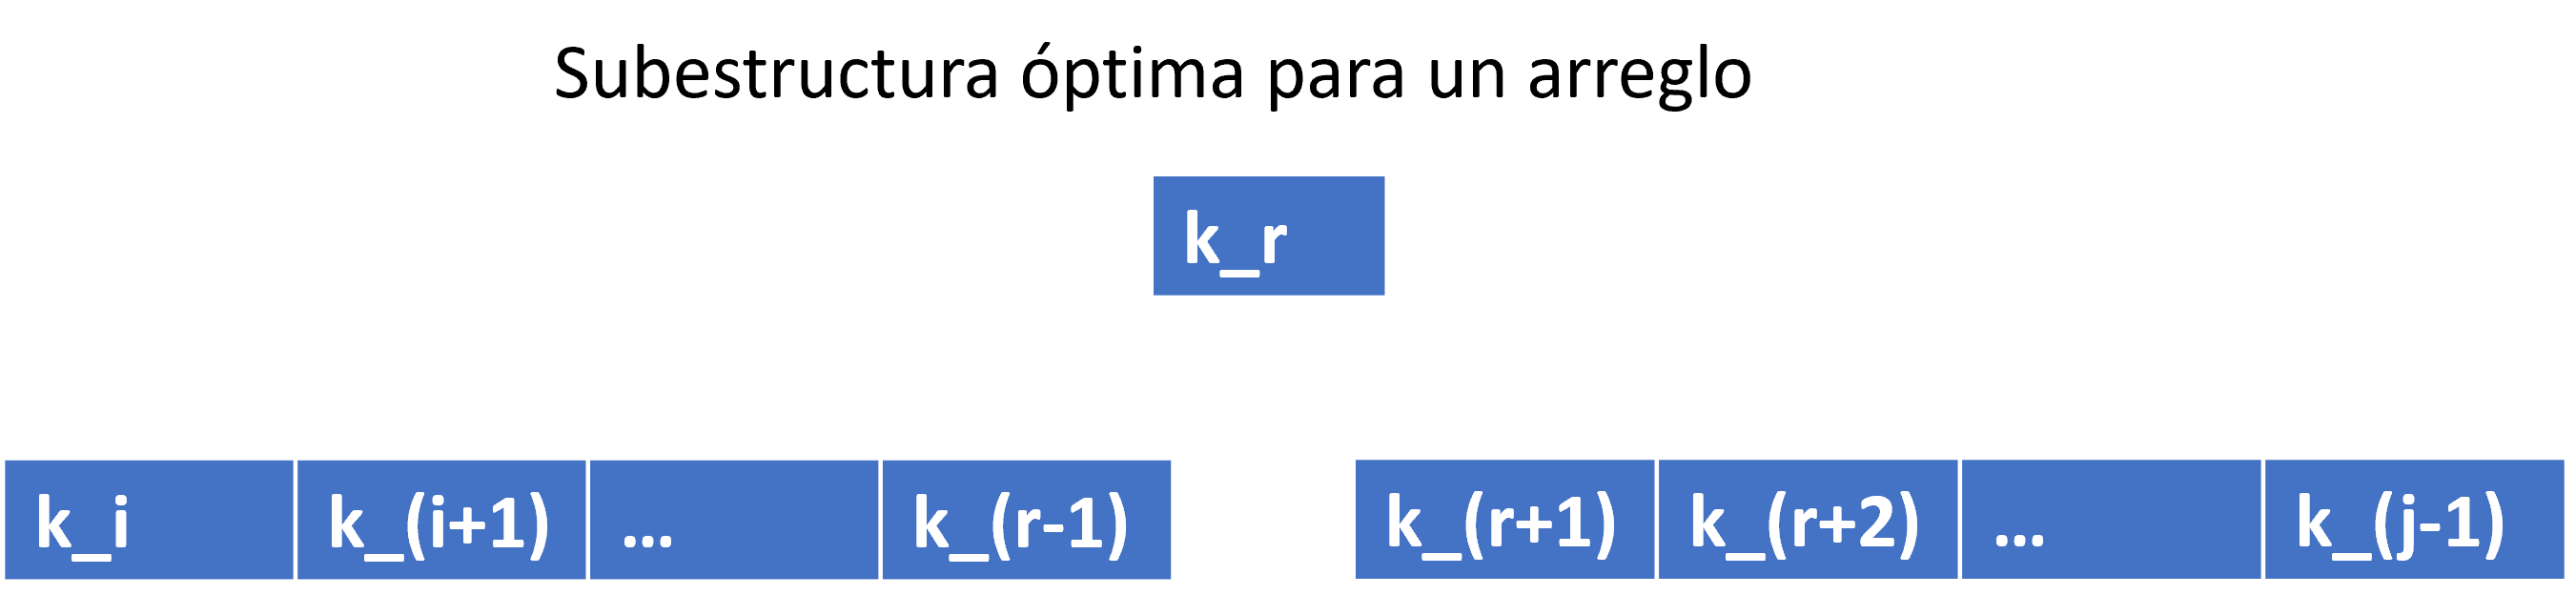

Es posible establecer una ecuación de recurrencia para este algoritmo considerando la forma en que trabaja los sub-problemas.

- Tomando en cuenta que la cantidad de sub-problemas crece en función de la clave raíz, se puede determinar que:

  $T(n) = \displaystyle\sum_{i = 0}^{n-1} T(i)$

- Ahora considerando la otra expresión vista para la subestructura óptima (representada en el código):

  $C[i,j] = \min\limits_{i\leq k \leq j}(C[i, k-1] + C[k,j] + w(i,j))$

  - Se infiere que el tiempo de ejecución para $w(i,j)$ es de O(n). Por lo que:

   $T(n) = \displaystyle\sum_{i = 0}^{n-1} T(i) + n $

  - Desarrollando la expresión queda:
   
   $T(n) = T(n-1) + T(n-2) + T(n-3) ... + T(0) + n $

  - Reduciendo los valores a una expresión conocida $(Fibonacci = F(n) = F(n-1) + F(n-2))$:

   $F(n-1) + F(n-2) \leq T(n-1) + T(n-2) + T(n-3) ... + T(0) + n $
   
   $T(n) \geq T(n-1) + T(n-2)$

   $T(n) \geq 2^n $

El tiempo de ejecución del algoritmo recursivo es de $O(2^n)$



---
###**---> Dinámico:**

####Definir la cantidad de sub-problemas:

En el algoritmo dinámico, se utiliza memoria extra para guardar las soluciones de los sub-problemas resueltos, de forma que el programa utilice esta información si se vuelve a topar con algún sub-problema repetido.

Cómo se aprecia en el código, los sub-problemas se almacenan en una matriz. Esto se debe a que estos depende de los índices iniciales y finales que tomarán para análizar el sub-problema. $i$ pasa a ser la clave más baja a utilizar, mientras que $j$ será la más alta. De esta forma se generan distintos rangos.

- Considerando que los índices varían en un rango propio, y que k será la cantidad de raíces (sub-problemas) a evaluar, se tiene que:

  - $S(n) = \displaystyle\sum_{i = 1}^{n} \displaystyle\sum_{j = 0}^{n-1}$ $k$<sub>$ij$</sub>
  - $S(n)$ = cantidad de sub-problemas.

- Tomando en cuenta que ambas sumatorias realizan $n$ pasos, se reduce la expresión a la siguiente:
  - $S(n) = O(n^2)$

Con lo anterior, es posible definir que el algoritmo resuelve $O(n^2)$ sub-problemas.

####Tiempo de Ejecución:

Para evaluar el tiempo de ejecución, es necesario obtener la complejidad de cada sub-problema. Los $O(n^2)$ sub-problemas, de forma general, se resuelven mediante la fórmula de la subestructura óptima.

- Teniendo la fórmula:
  - $C[i,j] = \min\limits_{i\leq k \leq j}(C[i, k-1] + C[k,j] + w(i,j))$
- Sabiendo que w(i,j) se calcula como:
  - $w(i,j) = \displaystyle\sum_{l = i}^{n} p_i + \displaystyle\sum_{l = i-1}^{n} q_i = O(n)$
- Y considerando que los costos anteriores ya fueron calculados, se obtiene que:
  - $C[i,j] = O(1) + O(1) + O(n)$
  - $C[i,j] = O(n)$

Cada sub-problema se calcula en un tiempo de O(n). Lo que deriva en la siguiente fórmula:

- $T(n) = O(n^2) * O(n)$. ---> Cantidad de sub-problemas X tiempo de ejecución individual.
- $T(n) = O(n^3)$

Esto da un tiempo de ejecución para el algoritmo de $O(n^3)$. Esto toma validez si se analiza el código, donde se realizan tres ciclos for anidados que tienen rangos $O(n)$.

No obstante, si se considera una matriz que guarde todos los datos de "$w(i,j)$", y se modifica el algoritmo en función de que cumpla únicamente con los valores de la subestructura óptima que representen una raíz válida entre los rangos determinados, es posible reducir el tiempo de ejecución.

####Complejidad Espacial:

Al ser un algoritmo dinámico, este guarda la información y resultados de los sub-problemas que debe ir resolviendo en función de utilizarlos más tarde durante el procedimiento. En este caso, el algoritmo hace uso de tres matrices auxiliares que guardan información obtenida de cada sub-problema.

Considerando lo anterior, se establece que:

 - Cada matriz guarda $\displaystyle\sum_{i = 1}^{n} \displaystyle\sum_{j = 0}^{n-1} k $ elementos.
 - A raíz de lo anterior, se obtiene que cada matriz ocupa $O(n^2)$.
 - Al ser tres matrices se concluye que la complejidad temporal es de $3*O(n^2)$.